# Etude de marché: La poule qui chante 🐔

## Table des matières
* [Matrice des correlations linéaires de pearson](#pearson)
    * [Variable centre-reduite](#cr)
* [CLASSIFICATION ASCENDANTE HIÉRARCHIQUE(CAH)](#cah)
    * [Dendrogramme](#dendo)
* [METHODE DES K-MEANS](#kmeans)
    * [Recherche nombre cluster](#reclu)
        * [Technique du coude](#coude)
        * [Technique de la silhouette](#si)
* [Analyse des clusters](#ana)
    * [Presentation des 5 clusters](#pre5)
    * [Distribution boite a moustache](#moustache)
    * [caractéristique de chaque groupe](#caragroupe)
        * [Conclusion](#conclu)
* [Analyse en Composante Principal](#acp)
    * [Eboulis des valeurs propre](#eboulis)
    * [Cercle de corrélation](#cercle)
* [Pestel](#pestel)
* [Conclusion](#conclusion)

In [1]:
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import datasets, preprocessing, decomposition
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df= pd.read_csv('clean_df.csv')

# Matrice des corellations linéaires de pearson <a class="anchor" id="pearson"></a>

In [3]:
corr_df = df.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
Disponibilité alimentaire (Kcal/personne/jour)_x,1.000000,0.883675,0.458221,0.105076,-0.018346,0.301062,0.084596,0.590409
Disponibilité de protéines en quantité (g/personne/jour)_x,0.883675,1.000000,0.667394,0.049935,0.060991,0.201568,0.223124,0.663019
ratio proteine animal,0.458221,0.667394,1.000000,0.309031,0.258449,-0.045852,0.509102,0.614289
Ratio protéine volaille/protéines animal,0.105076,0.049935,0.309031,1.000000,0.063149,-0.214263,0.417782,0.049389
TDI (%),-0.018346,0.060991,0.258449,0.063149,1.000000,-0.457199,0.665099,0.157966
TAS (%),0.301062,0.201568,-0.045852,-0.214263,-0.457199,1.000000,-0.439681,0.128431
importation volaille/hab(kg/hab),0.084596,0.223124,0.509102,0.417782,0.665099,-0.439681,1.000000,0.236557
rnb_hab,0.590409,0.663019,0.614289,0.049389,0.157966,0.128431,0.236557,1.000000


## Variable centrée réduite <a class="anchor" id="cr"></a>

Afin de rendre les variables comparables entre elles pour notre clustering, nous allons les centrer/reduire.

In [4]:
df.set_index('Zone',inplace=True)

In [5]:
from sklearn import preprocessing
#Valeur de nos variable dans X
X = df.values
#Centrage / réduction des données pour que nos données puissent prendre la même importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH) <a class="anchor" id="cah"></a>

## Dendrogramme <a class="anchor" id="dendo"></a>

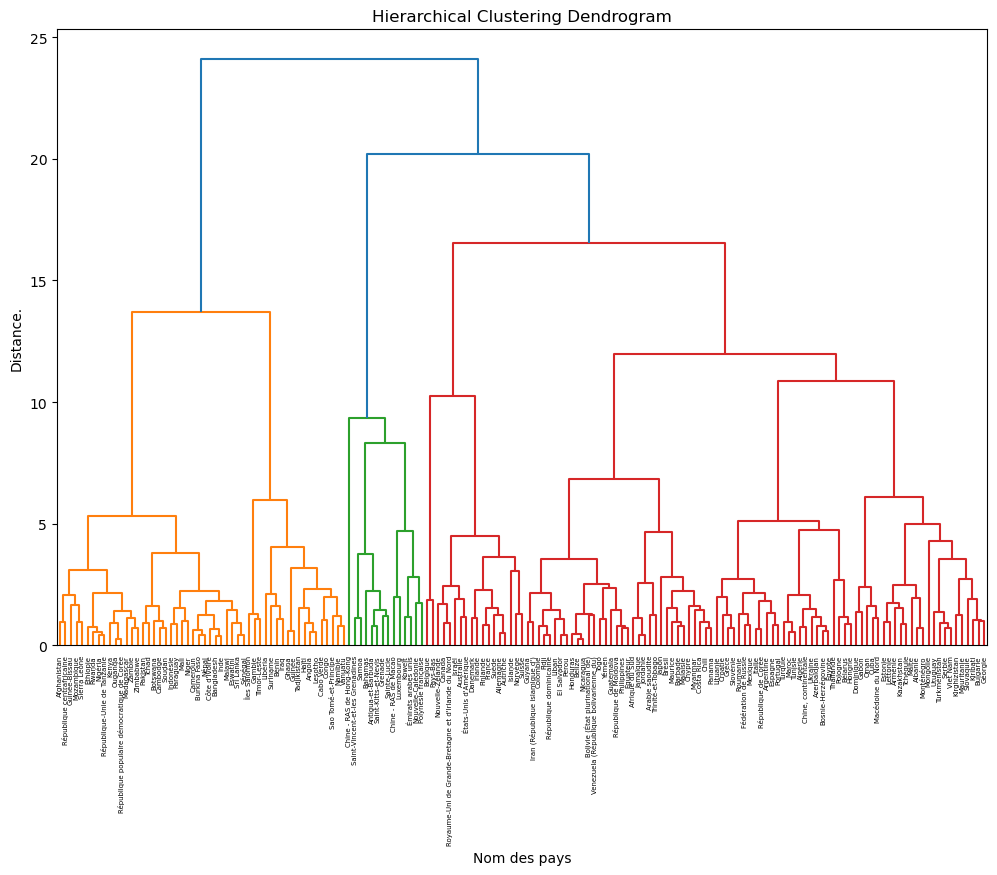

In [6]:
#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method="ward", metric='euclidean')

#generer le dendrogramme 
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z,labels= df.index, ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Nom des pays")
plt.ylabel("Distance.")
plt.show()

J'ai decidé de garder 5 clusters

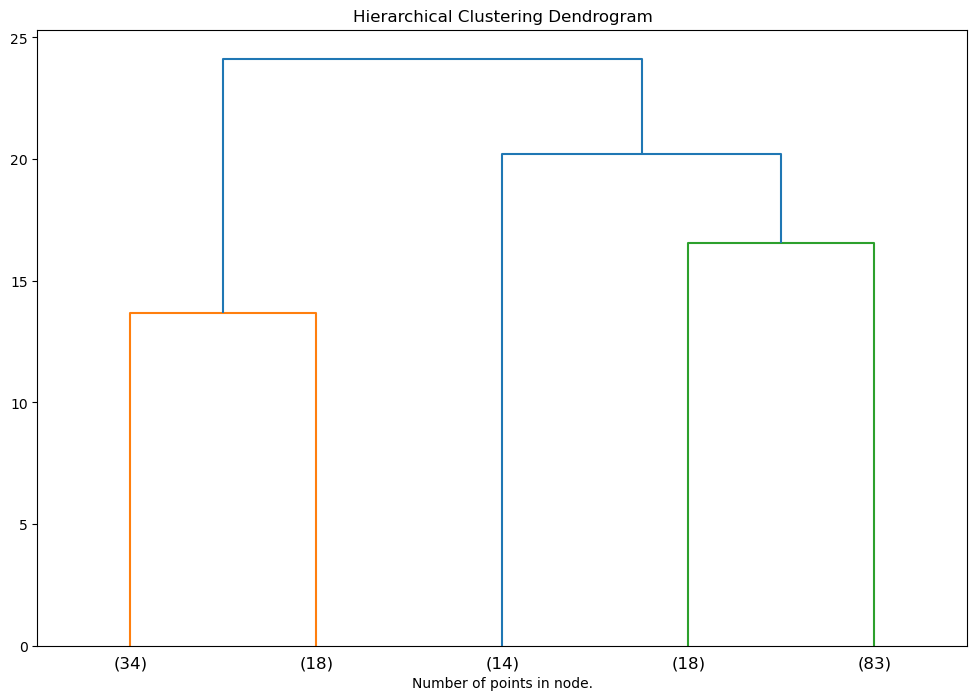

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z,p=5, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node.")
plt.show()

In [8]:
groupecah=fcluster(Z, 5, criterion='maxclust')
#Affichage des pays selon leurs groupes
df2 = pd.DataFrame({'clusters cah': groupecah, 'Zone': df.index})
df2.head()

,clusters cah,Zone
0,1,Afghanistan
1,5,Afrique du Sud
2,5,Albanie
3,5,Algérie
4,4,Allemagne


In [9]:
#Jointure des cluester CAH sur notre dataframe de base
df3 = pd.merge(df, df2, on='Zone')
df3.set_index('Zone', inplace=True)
df3.head()

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,537.126294,1
Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6537.504869,5
Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4532.791976,5
Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4081.775086,5
Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45734.557505,4


## Présentation des clusters

In [10]:
cluster1cah= df3[df3['clusters cah']==1]
cluster1cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,537.126294,1
Bangladesh,2596.0,60.22,0.91,3.93,0.00,99.60,0.000000,1847.625680,1
Botswana,2338.0,65.09,1.84,4.41,42.86,71.43,1.360495,6136.369105,1
Burkina Faso,2720.0,76.08,0.80,7.01,0.00,100.00,0.000000,684.484364,1
Cambodge,2468.0,65.38,1.40,3.83,26.32,73.68,0.624633,1313.916887,1
Cameroun,2652.0,69.49,0.60,9.46,0.00,98.78,0.000000,1453.605425,1
Côte d'Ivoire,2726.0,59.11,0.77,6.28,10.77,89.23,0.286445,2014.324313,1
Eswatini,2406.0,61.22,1.26,12.17,28.57,85.71,1.778086,3566.576151,1
Guinée-Bissau,2252.0,44.13,0.88,7.82,100.00,75.00,2.188010,719.711565,1


In [11]:
cluster2cah= df3[df3['clusters cah']==2]
cluster2cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Angola,2266.0,54.09,1.06,21.80,86.83,13.17,9.290075,3791.443852,2
Bénin,2754.0,64.45,0.74,34.44,76.40,11.18,11.006516,1083.181610,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3025.033509,2
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1795.115841,2
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,620.135020,2
Ghana,3034.0,62.95,0.66,14.65,71.56,28.44,5.185179,1900.205463,2
Guinée,2793.0,61.78,0.74,12.38,74.00,26.00,3.066082,839.328359,2
Haïti,2163.0,49.91,0.82,27.34,90.82,9.18,8.103900,1408.072278,2
Iraq,2505.0,60.54,1.32,39.37,83.04,16.96,12.515718,4389.505429,2


In [12]:
cluster3cah= df3[df3['clusters cah']==3]
cluster3cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,15667.510958,3
Bahamas,2043.0,61.37,2.78,33.93,92.31,23.08,62.867546,30065.911483,3
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47724.637597,3
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,70300.937271,3
Grenade,2404.0,70.57,3.01,35.85,87.50,12.50,63.134730,8447.112851,3
Koweït,3445.0,99.69,2.53,33.23,72.49,29.63,33.776296,33810.294518,3
Luxembourg,3334.0,105.79,2.49,10.64,100.00,0.00,18.583906,78873.811060,3
Nouvelle-Calédonie,2750.0,83.12,3.10,28.30,81.82,9.09,32.473390,32263.340715,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,19743.958991,3


In [13]:
cluster4cah= df3[df3['clusters cah']==4]
cluster4cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45734.557505,4
Australie,3307.0,108.01,2.88,23.19,1.37,108.37,0.650813,55633.452640,4
Autriche,3694.0,108.11,2.54,11.54,63.58,85.55,12.471795,46984.806575,4
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44567.104136,4
Canada,3492.0,101.33,2.03,27.01,12.70,98.88,4.954795,44551.243918,4
Danemark,3383.0,112.92,2.78,17.71,79.64,103.59,23.201961,59155.352620,4
Finlande,3337.0,117.77,2.46,10.62,14.41,116.22,2.903089,46435.935525,4
France,3556.0,112.08,2.70,12.83,32.17,111.25,7.803523,41372.562733,4
Irlande,3714.0,105.81,2.26,19.13,77.34,85.94,20.827728,56058.607933,4


In [14]:
cluster5cah= df3[df3['clusters cah']==5]
cluster5cah

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6537.504869,5
Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4532.791976,5
Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4081.775086,5
Arabie saoudite,3194.0,87.51,2.49,41.85,50.31,42.93,21.811912,20451.017286,5
Argentine,3239.0,102.66,3.09,20.60,0.41,110.14,0.182078,14236.884208,5
...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),2247.0,56.30,1.74,28.44,3.99,95.85,0.850268,7704.542477,5
Viet Nam,2938.0,90.03,1.88,10.90,24.13,76.12,3.076089,2199.039303,5
Yémen,2062.0,53.24,1.29,28.36,31.71,68.29,2.802246,608.982554,5


### Comparaison a l'aide de boite a moustache

<AxesSubplot:xlabel='clusters cah', ylabel='Ratio protéine volaille/protéines animal'>

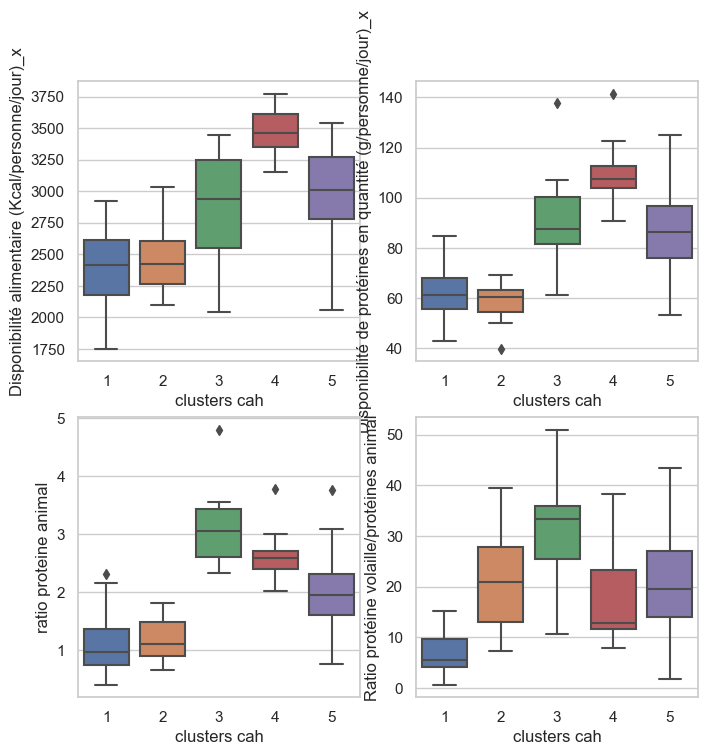

In [15]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='clusters cah', y='Disponibilité alimentaire (Kcal/personne/jour)_x')
plt.subplot(222)
sns.boxplot(data=df3, x='clusters cah', y='Disponibilité de protéines en quantité (g/personne/jour)_x')
plt.subplot(223)
sns.boxplot(data=df3, x='clusters cah', y='ratio proteine animal')
plt.subplot(224)
sns.boxplot(data=df3, x='clusters cah', y='Ratio protéine volaille/protéines animal')

<AxesSubplot:xlabel='clusters cah', ylabel='importation volaille/hab(kg/hab)'>

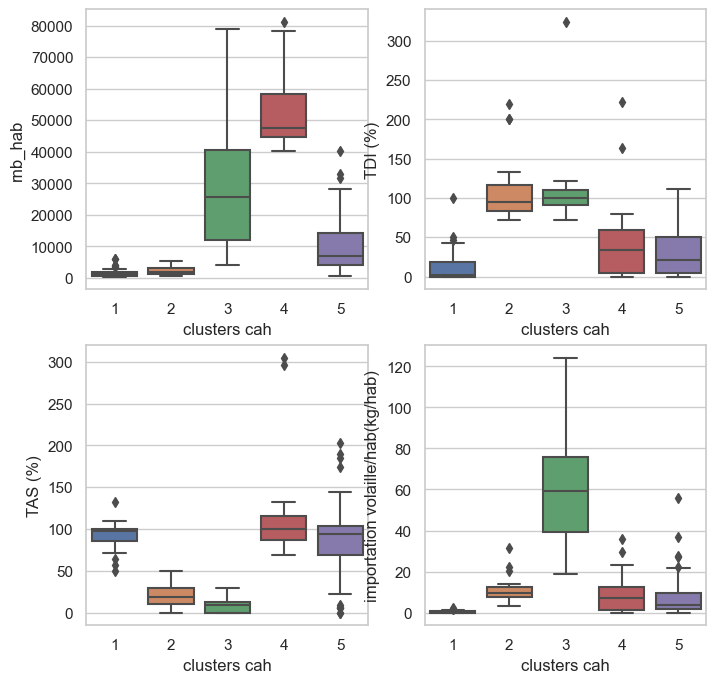

In [16]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='clusters cah', y='rnb_hab')
plt.subplot(222)
sns.boxplot(data=df3, x='clusters cah', y='TDI (%)')
plt.subplot(223)
sns.boxplot(data=df3, x='clusters cah', y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=df3, x='clusters cah', y='importation volaille/hab(kg/hab)')

### Conclusion

Deux groupes ce démarquent des autres pour notre objectif d'exportation de poulet :  


* le **groupe 3** : 
    Ce groupe inclus des pays : 

        * Un RNB élevé
        * Une disponibilité élevé
        * Un taux de dépendance à l'importation élevé
        * Un taux d'auto-suffisance des plus faible
        * Un taux de proteine animal des plus élevé
        * Un ratio de proteine volaille/animal des plus élevé
        * Une imporation de volaille/hab des plus élevé


* le **groupe 2**:  
    Ce groupe inclus des pays : 

        * Un RNB  très faible
        * Une disponibilité faible
        * Un taux de dépendance à l'importation élevé
        * Un taux d'auto-suffisance faible
        * Un taux de proteine animal  faible
        * Un ratio de proteine volaille/animal moyen
        * Une imporation de volaille/hab  faible

In [17]:
DFgroupedcah=df3.groupby(['clusters cah']).mean().reset_index()
DFgroupedcah

,clusters cah,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
0,1,2400.852941,62.085882,1.086765,6.879706,12.824706,91.541765,0.360624,1623.676504
1,2,2449.555556,58.366667,1.184444,21.708333,111.407778,20.870556,11.461053,2292.814515
2,3,2868.000000,91.621429,3.099286,31.310000,114.352857,9.005000,60.452130,30267.386239
3,4,3475.222222,108.921667,2.602778,17.341667,47.600556,121.187778,10.080773,53318.431537
4,5,3002.975904,86.143253,2.003133,20.695301,32.132530,87.096627,7.141176,9868.242902


In [18]:
df3[df3['clusters cah']==2]

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Angola,2266.0,54.09,1.06,21.80,86.83,13.17,9.290075,3791.443852,2
Bénin,2754.0,64.45,0.74,34.44,76.40,11.18,11.006516,1083.181610,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3025.033509,2
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1795.115841,2
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,620.135020,2
Ghana,3034.0,62.95,0.66,14.65,71.56,28.44,5.185179,1900.205463,2
Guinée,2793.0,61.78,0.74,12.38,74.00,26.00,3.066082,839.328359,2
Haïti,2163.0,49.91,0.82,27.34,90.82,9.18,8.103900,1408.072278,2
Iraq,2505.0,60.54,1.32,39.37,83.04,16.96,12.515718,4389.505429,2


In [19]:
df3[df3['clusters cah']==3]

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,15667.510958,3
Bahamas,2043.0,61.37,2.78,33.93,92.31,23.08,62.867546,30065.911483,3
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47724.637597,3
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,70300.937271,3
Grenade,2404.0,70.57,3.01,35.85,87.50,12.50,63.134730,8447.112851,3
Koweït,3445.0,99.69,2.53,33.23,72.49,29.63,33.776296,33810.294518,3
Luxembourg,3334.0,105.79,2.49,10.64,100.00,0.00,18.583906,78873.811060,3
Nouvelle-Calédonie,2750.0,83.12,3.10,28.30,81.82,9.09,32.473390,32263.340715,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,19743.958991,3


# METHODE K-MEANS <a class="anchor" id="kmeans"></a>

## Recherche du nombre de clusters <a class="anchor" id="reclu"></a>

### Methode du Coude  <a class="anchor" id="coude"></a>

C:\Users\GUIGUI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


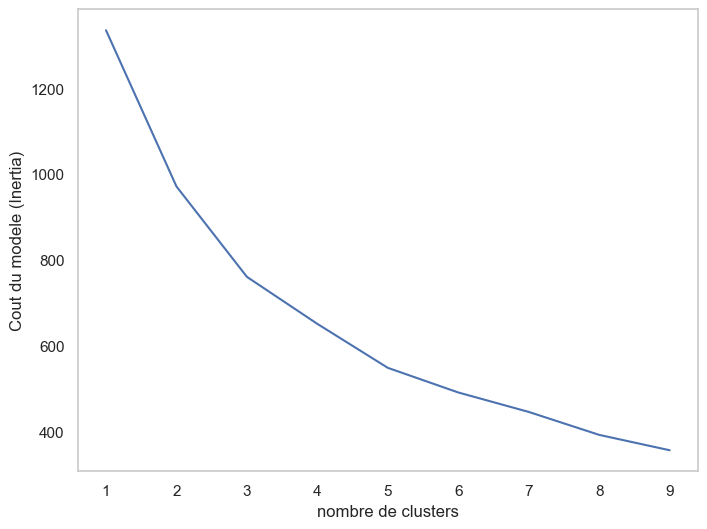

In [20]:
inertia = []
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(model.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid()
plt.show()

### Methode de silhouette <a class="anchor" id="si"></a>

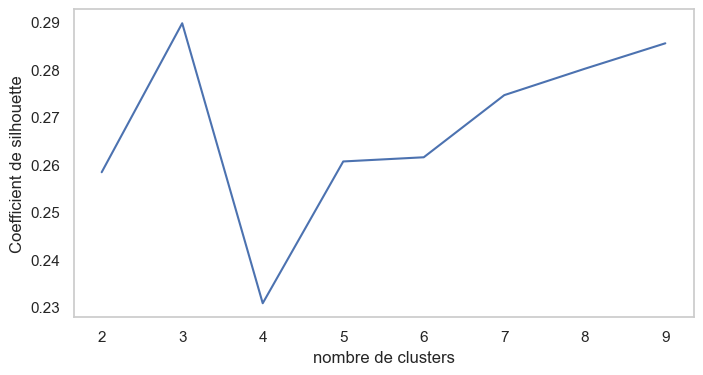

[0.25835450391140746,
 0.28974414085581196,
 0.23075009045625203,
 0.2606249082204215,
 0.26150650307625234,
 0.2745991647151579,
 0.2801571932643785,
 0.2855213577676264]

In [21]:
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X_scaled)
    tab_silhouette.append(silhouette_score(X_scaled,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

### Observation

Nous avons utilisé 2 méthodes pour determiner le nombre de groupe de cluster :

-Méthode du coude : on remarque que l’inertie stagne à partir de 5 clusters.

-Coefficient de silhouette : celle-ci est un peu différente, elle nous indique que le nombre de cluster idéal serrait de 3.  

Pour notre usage, 3 groupes seront certainement insuffisants, nous risquerions de nous retrouver avec une classification “pays riche” /"pays en voie de developpement" et  “pays pauvre” vis à vis des données étudiées.   
Nous allons donc prendre 5 clusters
   

# Analyse des clusters <a class="anchor" id="ana"></a>

In [22]:
# Clustering par K-means
km = KMeans(n_clusters=5)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [23]:
df_c1 = pd.DataFrame({'cluster': clusters, 'Zone': df.index})
df_c1

,cluster,Zone
0,4,Afghanistan
1,0,Afrique du Sud
2,2,Albanie
3,0,Algérie
4,2,Allemagne
...,...,...
162,3,Émirats arabes unis
163,0,Équateur
164,2,États-Unis d'Amérique
165,4,Éthiopie


In [24]:
# Reset de l'index pour pouvoir merge
df.reset_index(inplace=True)

In [25]:
#Notre df + les clusters pour pouvoir etudier nos groupes
df_c = pd.merge(df, df_c1, on='Zone')
df_c.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
0,Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,537.126294,4
1,Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6537.504869,0
2,Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4532.791976,2
3,Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4081.775086,0
4,Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45734.557505,2


In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Zone                                                        167 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)_x            167 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)_x  167 non-null    float64
 3   ratio proteine animal                                       167 non-null    float64
 4   Ratio protéine volaille/protéines animal                    167 non-null    float64
 5   TDI (%)                                                     167 non-null    float64
 6   TAS (%)                                                     167 non-null    float64
 7   importation volaille/hab(kg/hab)                            167 non-null    float64
 8   

In [27]:
df_c_grouped = pd.pivot_table(df_c, index ='cluster', values= "Zone", aggfunc= len)
df_c_grouped

,Zone
cluster,
0,54
1,28
2,32
3,14
4,39


In [28]:
df_c.set_index('Zone',inplace=True)

## Presentation des 5 clusters <a class="anchor" id="pre5"></a>

In [29]:
Kcluster1= df_c[df_c['cluster']==0]
Kcluster1

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Afrique du Sud,2987.0,83.36,2.27,40.83,24.27,78.71,9.016001,6537.504869,0
Algérie,3345.0,92.85,1.18,7.64,0.72,99.28,0.048322,4081.775086,0
Arabie saoudite,3194.0,87.51,2.49,41.85,50.31,42.93,21.811912,20451.017286,0
Argentine,3239.0,102.66,3.09,20.60,0.41,110.14,0.182078,14236.884208,0
Azerbaïdjan,3102.0,92.30,1.39,14.79,20.93,80.62,2.742420,3904.220947,0
Barbade,2896.0,88.74,3.09,29.66,11.76,88.24,6.987339,17041.773858,0
Belize,2694.0,67.11,1.62,31.65,0.00,105.26,0.000000,5687.517007,0
Bolivie (État plurinational de),2354.0,68.40,2.04,36.76,0.23,124.24,0.089343,3202.604089,0
Bosnie-Herzégovine,3266.0,94.58,1.29,16.15,18.18,110.91,2.983716,5211.893837,0


In [30]:
Kcluster2= df_c[df_c['cluster']==1]
Kcluster2

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Angola,2266.0,54.09,1.06,21.80,86.83,13.17,9.290075,3791.443852,1
Arménie,3072.0,97.33,1.62,12.17,74.47,23.40,11.885394,4184.835842,1
Bénin,2754.0,64.45,0.74,34.44,76.40,11.18,11.006516,1083.181610,1
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3025.033509,1
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1795.115841,1
Cuba,3409.0,88.40,1.41,21.83,91.23,8.48,27.515038,8423.922752,1
Gabon,2640.0,79.31,2.08,27.17,97.44,5.13,36.807029,6534.800237,1
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,620.135020,1
Ghana,3034.0,62.95,0.66,14.65,71.56,28.44,5.185179,1900.205463,1


In [31]:
Kcluster3= df_c[df_c['cluster']==2]
Kcluster3

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Albanie,3400.0,119.50,1.92,9.43,80.85,27.66,13.175372,4532.791976,2
Allemagne,3559.0,104.07,2.44,12.62,48.42,87.06,10.186501,45734.557505,2
Australie,3307.0,108.01,2.88,23.19,1.37,108.37,0.650813,55633.452640,2
Autriche,3694.0,108.11,2.54,11.54,63.58,85.55,12.471795,46984.806575,2
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44567.104136,2
Canada,3492.0,101.33,2.03,27.01,12.70,98.88,4.954795,44551.243918,2
Danemark,3383.0,112.92,2.78,17.71,79.64,103.59,23.201961,59155.352620,2
Espagne,3270.0,106.99,2.59,18.75,13.69,101.20,4.394669,28201.404061,2
Estonie,3241.0,107.29,2.18,11.80,72.41,68.97,15.916446,19932.665237,2


In [32]:
Kcluster4 = df_c[df_c['cluster']== 3]
Kcluster4

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,15667.510958,3
Bahamas,2043.0,61.37,2.78,33.93,92.31,23.08,62.867546,30065.911483,3
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47724.637597,3
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,70300.937271,3
Dominique,2945.0,78.96,1.60,26.50,100.00,0.00,55.976938,6896.644240,3
Grenade,2404.0,70.57,3.01,35.85,87.50,12.50,63.134730,8447.112851,3
Koweït,3445.0,99.69,2.53,33.23,72.49,29.63,33.776296,33810.294518,3
Nouvelle-Calédonie,2750.0,83.12,3.10,28.30,81.82,9.09,32.473390,32263.340715,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,19743.958991,3


In [33]:
Kcluster5= df_c[df_c['cluster']==4]
Kcluster5

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,537.126294,4
Bangladesh,2596.0,60.22,0.91,3.93,0.00,99.60,0.000000,1847.625680,4
Botswana,2338.0,65.09,1.84,4.41,42.86,71.43,1.360495,6136.369105,4
Burkina Faso,2720.0,76.08,0.80,7.01,0.00,100.00,0.000000,684.484364,4
Cambodge,2468.0,65.38,1.40,3.83,26.32,73.68,0.624633,1313.916887,4
Cameroun,2652.0,69.49,0.60,9.46,0.00,98.78,0.000000,1453.605425,4
Côte d'Ivoire,2726.0,59.11,0.77,6.28,10.77,89.23,0.286445,2014.324313,4
Eswatini,2406.0,61.22,1.26,12.17,28.57,85.71,1.778086,3566.576151,4
Guinée-Bissau,2252.0,44.13,0.88,7.82,100.00,75.00,2.188010,719.711565,4


## Distribution des variables par groupes à l'aide de boite à moustache <a class="anchor" id="moustache"></a>

<AxesSubplot:xlabel='cluster', ylabel='Ratio protéine volaille/protéines animal'>

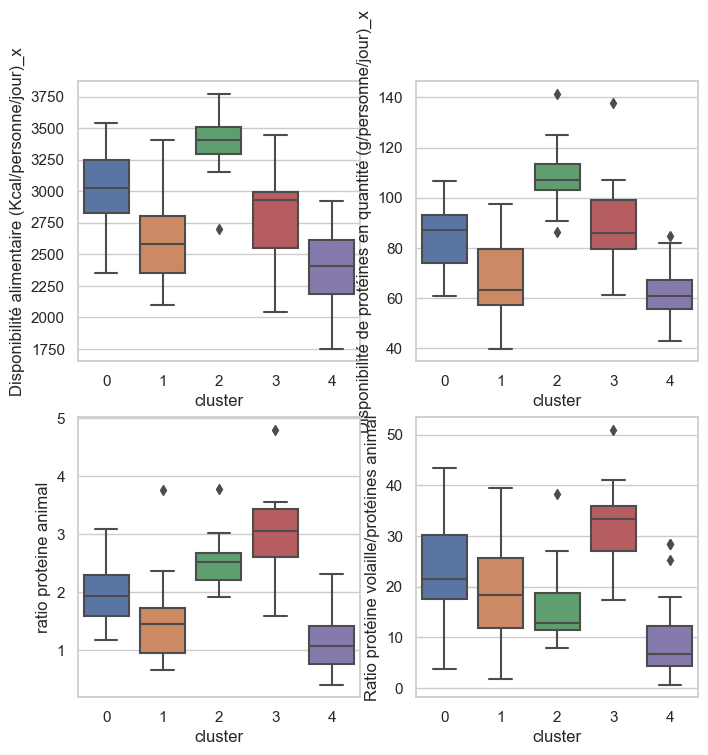

In [34]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_c, x='cluster', y='Disponibilité alimentaire (Kcal/personne/jour)_x')
plt.subplot(222)
sns.boxplot(data=df_c, x='cluster', y='Disponibilité de protéines en quantité (g/personne/jour)_x')
plt.subplot(223)
sns.boxplot(data=df_c, x='cluster', y='ratio proteine animal')
plt.subplot(224)
sns.boxplot(data=df_c, x='cluster', y='Ratio protéine volaille/protéines animal')

<AxesSubplot:xlabel='cluster', ylabel='importation volaille/hab(kg/hab)'>

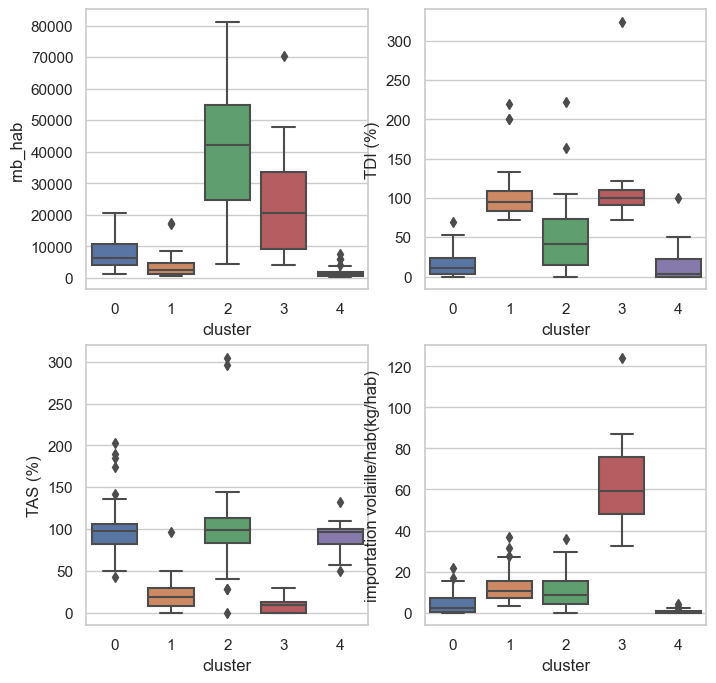

In [35]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_c, x='cluster', y='rnb_hab')
plt.subplot(222)
sns.boxplot(data=df_c, x='cluster', y='TDI (%)')
plt.subplot(223)
sns.boxplot(data=df_c, x='cluster', y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=df_c, x='cluster', y='importation volaille/hab(kg/hab)')

### Conclusion <a class="anchor" id="conclu"></a>

Deux groupes ce démarquent des autres pour notre objectif d'exportation de poulet :  


* le **groupe 3** : 
    Ce groupe inclus des pays : 

        * Un RNB moyen
        * Une disponibilité moyenne
        * Un taux de dépendance à l'importation élevé
        * Un taux d'auto-suffisance des plus faible
        * Un taux de proteine animal des plus élevé
        * Un ratio de proteine volaille/animal des plus élevé
        * Une imporation de volaille/hab des plus élevé


* le **groupe 1**:  
    Ce groupe inclus des pays : 

        * Un RNB  faible
        * Une disponibilité faible
        * Un taux de dépendance à l'importation élevé
        * Un taux d'auto-suffisance faible
        * Un taux de proteine animal  faible
        * Un ratio de proteine volaille/animal moyen
        * Une imporation de volaille/hab  faible

In [36]:
DFgrouped=df_c.groupby(['cluster']).mean().reset_index()
DFgrouped

,cluster,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
0,0,3013.666667,84.580370,1.970370,23.220926,16.228333,100.374259,4.131627,8206.995487
1,1,2599.357143,66.707143,1.476071,18.990357,105.130000,21.440357,13.066571,3931.232942
2,2,3405.125000,108.123125,2.506562,15.659375,50.101250,105.058437,10.689564,41344.637455
3,3,2840.214286,89.705000,3.035714,32.442857,114.352857,9.005000,63.123061,25126.160038
4,4,2395.564103,61.634615,1.136667,9.023077,13.896923,90.155897,0.623097,1819.694373


In [80]:
Kcluster4

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,15667.510958,3
Bahamas,2043.0,61.37,2.78,33.93,92.31,23.08,62.867546,30065.911483,3
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47724.637597,3
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,70300.937271,3
Dominique,2945.0,78.96,1.60,26.50,100.00,0.00,55.976938,6896.644240,3
Grenade,2404.0,70.57,3.01,35.85,87.50,12.50,63.134730,8447.112851,3
Koweït,3445.0,99.69,2.53,33.23,72.49,29.63,33.776296,33810.294518,3
Nouvelle-Calédonie,2750.0,83.12,3.10,28.30,81.82,9.09,32.473390,32263.340715,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,19743.958991,3


In [81]:
Kcluster2

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Angola,2266.0,54.09,1.06,21.80,86.83,13.17,9.290075,3791.443852,1
Arménie,3072.0,97.33,1.62,12.17,74.47,23.40,11.885394,4184.835842,1
Bénin,2754.0,64.45,0.74,34.44,76.40,11.18,11.006516,1083.181610,1
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3025.033509,1
Congo,2305.0,55.63,1.59,27.86,94.55,6.36,20.349483,1795.115841,1
Cuba,3409.0,88.40,1.41,21.83,91.23,8.48,27.515038,8423.922752,1
Gabon,2640.0,79.31,2.08,27.17,97.44,5.13,36.807029,6534.800237,1
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,620.135020,1
Ghana,3034.0,62.95,0.66,14.65,71.56,28.44,5.185179,1900.205463,1


In [39]:
km.cluster_centers_

array([[ 0.33564831,  0.16752823,  0.10893112,  0.43087155, -0.56154144,
         0.45650723, -0.36696246, -0.30471519],
       [-0.57122065, -0.70939908, -0.52068177,  0.04310152,  1.15529791,
        -1.15337915,  0.109556  , -0.53906638],
       [ 1.19249902,  1.32262372,  0.79190544, -0.26221322,  0.09260103,
         0.55204279, -0.01721454,  1.51153293],
       [-0.0440161 ,  0.4189617 ,  1.46591212,  1.27614526,  1.33340665,
        -1.4070029 ,  2.77916915,  0.62261093],
       [-1.01729677, -0.95827623, -0.95299833, -0.87049018, -0.60656486,
         0.24809993, -0.55407944, -0.65479815]])

In [40]:
table_centro_k = pd.DataFrame(km.cluster_centers_, columns = ['Disponibilité alimentaire (Kcal/personne/jour)_x', 'Disponibilité de protéines en quantité (g/personne/jour)_x', 'ratio proteine animal', 'Ratio protéine volaille/protéines animal', 'TDI (%)','TAS (%)','importation volaille/hab(kg/hab)','rnb_hab'] )
table_centro_k

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
0,0.335648,0.167528,0.108931,0.430872,-0.561541,0.456507,-0.366962,-0.304715
1,-0.571221,-0.709399,-0.520682,0.043102,1.155298,-1.153379,0.109556,-0.539066
2,1.192499,1.322624,0.791905,-0.262213,0.092601,0.552043,-0.017215,1.511533
3,-0.044016,0.418962,1.465912,1.276145,1.333407,-1.407003,2.779169,0.622611
4,-1.017297,-0.958276,-0.952998,-0.870490,-0.606565,0.248100,-0.554079,-0.654798


## Heatmap des centroide du Kmeans

<AxesSubplot:>

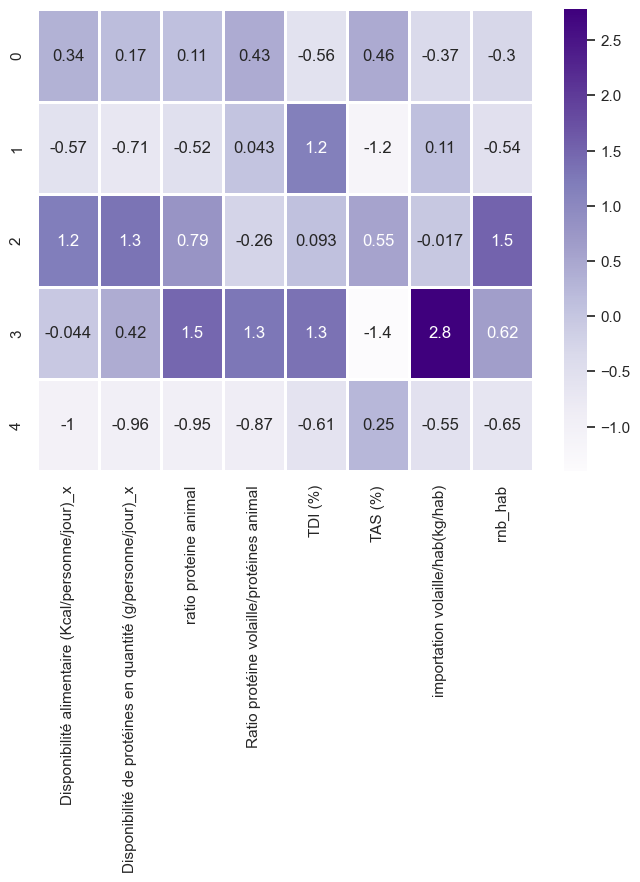

In [41]:
fig, ax = plt.subplots(figsize = (8, 6)) 
cols = table_centro_k.index
idx = table_centro_k.columns

sns.heatmap(table_centro_k, cmap ='Purples', linewidths = 0.80, annot = True)

# Comparaison des deux méthode de clustering

In [42]:
dfcross = pd.merge(df3, df_c  , on= "Zone")
pd.crosstab(dfcross['cluster'],dfcross['clusters cah'])

clusters cah,1,2,3,4,5
cluster,,,,,
0,0,0,0,0,54
1,0,18,0,0,10
2,0,0,1,18,13
3,0,0,13,0,1
4,34,0,0,0,5


In [43]:
Cah_clus1 = df2[df2['clusters cah']== 1]
Cah_clus2 = df2[df2['clusters cah']== 2]
Cah_clus3 = df2[df2['clusters cah']== 3]
Cah_clus4 = df2[df2['clusters cah']== 4]
Cah_clus5 = df2[df2['clusters cah']== 5]

In [44]:
Kmeans_clus1 = df_c1[df_c1['cluster']== 0]
Kmeans_clus2 = df_c1[df_c1['cluster']== 1]
Kmeans_clus3 = df_c1[df_c1['cluster']== 2]
Kmeans_clus4 = df_c1[df_c1['cluster']== 3]
Kmeans_clus5 = df_c1[df_c1['cluster']== 4]

In [82]:
notregroupe1=pd.concat([Cah_clus3, Kmeans_clus4],axis=1)
notregroupe1

,clusters cah,Zone,cluster,Zone
6,3.0,Antigua-et-Barbuda,3.0,Antigua-et-Barbuda
13,3.0,Bahamas,3.0,Bahamas
31,3.0,Chine - RAS de Hong-Kong,3.0,Chine - RAS de Hong-Kong
32,3.0,Chine - RAS de Macao,3.0,Chine - RAS de Macao
54,3.0,Grenade,3.0,Grenade
79,3.0,Koweït,3.0,Koweït
85,3.0,Luxembourg,NaN,NaN
105,3.0,Nouvelle-Calédonie,3.0,Nouvelle-Calédonie
116,3.0,Polynésie française,3.0,Polynésie française
128,3.0,Saint-Kitts-et-Nevis,3.0,Saint-Kitts-et-Nevis


In [83]:
notregroupe2=pd.concat([Cah_clus2, Kmeans_clus2],axis=1)
notregroupe2

,clusters cah,Zone,cluster,Zone
5,2.0,Angola,1,Angola
25,2.0,Bénin,1,Bénin
26,2.0,Cabo Verde,1,Cabo Verde
36,2.0,Congo,1,Congo
52,2.0,Gambie,1,Gambie
53,2.0,Ghana,1,Ghana
57,2.0,Guinée,1,Guinée
61,2.0,Haïti,1,Haïti
67,2.0,Iraq,1,Iraq
80,2.0,Lesotho,1,Lesotho


nous retrouvons ici nos 2 groupes qui pourrait nous interesser 

# ANALYSE EN COMPOSANTES PRINCIPALES (ACP) <a class="anchor" id="acp"></a>

cette méthode vise à réduire le nombre de variables appliquées à des individus, pour simplifier les observations tout en conservant un maximum d’informations. 

## Eboulis des valeurs propres <a class="anchor" id="eboulis"></a>

[0.40228438 0.27506307 0.12140767 0.06283654 0.05998245 0.04426076
 0.02667354 0.0074916 ]
0.9999999999999999


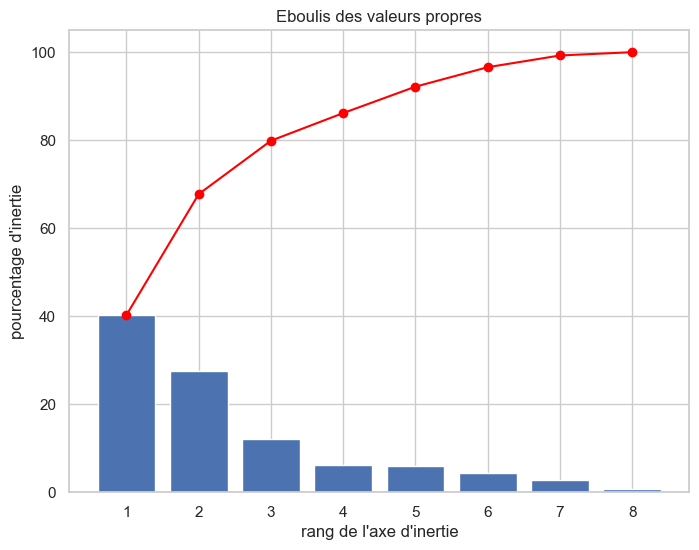

In [47]:
# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
    
#Afficher la figure
figure1 = plt.figure(figsize=(8,6))
display_scree_plot(pca)
plt.show()


### Observation eboulis :

Nous garderons 5 axes :  
* Axe 1 : 40% de l'inertie totale  
* Axe 2 : 27% de l'inertie totale  
* Axe 3 : 12% de l'inertie totale  
* Axe 4 : 06% de l'inertie totale  
* Axe 5 : 06% de l'inertie totale 

Pour un total de **92%** de l'information totale

### Correlation de nos variable sur les composantes principales

In [48]:
df.set_index('Zone',inplace=True)

In [49]:
# création de la matrice de corrélation
t=pca.components_[:]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4','F5','F6','F7','F8'],columns=df.columns)
df_corr_comp.head()

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab
F1,0.426508,0.484668,0.474017,0.171280,0.194884,-0.000848,0.311639,0.440521
F2,-0.314168,-0.244094,0.062871,0.261355,0.472908,-0.540910,0.481206,-0.147214
F3,-0.026490,0.072148,-0.094823,-0.851524,0.472573,-0.079132,-0.005868,0.174320
F4,-0.297165,-0.252371,0.171873,0.045893,0.264258,0.811282,0.294689,0.038772
F5,0.513578,0.203586,-0.464434,0.116738,0.345864,0.198861,0.157140,-0.530662


Premier axe **F1** :  
Il représente nos dispo (0.42,0.48), notre ratio de proteine animal(0.47) ainsi que le rnb_hab  (0.44)

Deuxieme axe **F2** :  
Il représente notre TDI(0.47), TAS(-0.54) ainsi que notre importation de vollaile/hab(0.48)  

Troisième axe **F3** :  
Il représente notre Ratio de proteine de vollaile/ les proteine animal(-0.85) et  TDI(0.47)  

Quatrième axe **F4** :  
Il représente notre TAS (0.81)  

Cinquième axe **F5** :  
Il représente notre dispo alimentaire(0.51), le ratio de proteine animal (-0.46) ainsi que le rnb_hab(-0.53)

### Qualité de représentation des individus

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale

In [50]:
di = np.sum(X_scaled**2,axis=1) #pourcentage d'inertie

df_ctr_ind = pd.DataFrame({'Zone':df.index,'d_i':di})
df_ctr_ind

,Zone,d_i
0,Afghanistan,9.078334
1,Afrique du Sud,4.844347
2,Albanie,7.423464
3,Algérie,4.808287
4,Allemagne,7.503883
...,...,...
162,Émirats arabes unis,14.632504
163,Équateur,2.455191
164,États-Unis d'Amérique,16.463948
165,Éthiopie,9.058799


In [51]:
df_ctr_ind.sort_values(by= "d_i", ascending = False)

,Zone,d_i
31,Chine - RAS de Hong-Kong,93.606040
16,Belgique,42.842039
113,Pays-Bas,33.432492
129,Saint-Vincent-et-les Grenadines,28.822098
69,Islande,28.528888
...,...,...
145,Tchéquie,1.417669
37,Costa Rica,1.316680
78,Kiribati,1.134175
34,Chypre,1.048649


In [52]:
coord = pca.fit_transform(X_scaled)
#qualité de représentation des individus par dimensions- COS2
cos2 = coord**2
p=5 # nombre de variables
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
    df_ctr_12 = pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4]})
df_ctr_12

,id,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5
0,Afghanistan,0.752671,0.061350,0.126667,0.000076,0.052293
1,Afrique du Sud,0.044890,0.013842,0.866629,0.001118,0.011028
2,Albanie,0.207647,0.000168,0.170900,0.300384,0.191238
3,Algérie,0.042170,0.556368,0.036203,0.110281,0.183944
4,Allemagne,0.650385,0.192666,0.075661,0.023558,0.008766
...,...,...,...,...,...,...
162,Émirats arabes unis,0.720947,0.193325,0.004850,0.026984,0.001824
163,Équateur,0.490699,0.081866,0.210458,0.044075,0.127030
164,États-Unis d'Amérique,0.557033,0.309730,0.031997,0.008372,0.024583
165,Éthiopie,0.742048,0.058973,0.115060,0.002980,0.000767


Nous avons la qualité de representation des individus (ici des pays) sur les 5 dimensions de l'ACP

### Qualité de représentation des variables

Nous avons une idée des individus que nous allons pouvoir étudier. 

La prochaine étape est de caractériser nos composantes principales. Pour rappel, chaque composante est composé d'une combinaison linéaire des variables corrélés de notre jeu de données d'entré. Chaque composante est décorrélé

In [53]:
#Nous avons besoin des vecteurs propres pour l’analyse des variables. Ils sont fournis par le champ .components_de l'objet ACP
print(pca.components_)

[[ 4.26507838e-01  4.84668010e-01  4.74017268e-01  1.71280201e-01
   1.94884387e-01 -8.47990156e-04  3.11639328e-01  4.40521274e-01]
 [-3.14168227e-01 -2.44094298e-01  6.28711841e-02  2.61355332e-01
   4.72907985e-01 -5.40909670e-01  4.81206424e-01 -1.47214293e-01]
 [-2.64896830e-02  7.21477324e-02 -9.48228568e-02 -8.51523660e-01
   4.72573015e-01 -7.91319363e-02 -5.86827207e-03  1.74320193e-01]
 [-2.97164811e-01 -2.52371114e-01  1.71872744e-01  4.58926899e-02
   2.64258218e-01  8.11282035e-01  2.94688511e-01  3.87717877e-02]
 [ 5.13578315e-01  2.03586254e-01 -4.64433894e-01  1.16738098e-01
   3.45864276e-01  1.98861489e-01  1.57139782e-01 -5.30662253e-01]
 [-1.12781719e-01  2.61035820e-01  5.47511461e-01 -3.03713496e-01
  -2.38371506e-01 -1.14351524e-02  1.70414980e-01 -6.64181372e-01]
 [ 1.07537523e-02 -3.88249912e-02  3.77958867e-01  2.07544195e-01
   5.10574113e-01  4.54027176e-03 -7.23240190e-01 -1.69312040e-01]
 [ 5.94796366e-01 -7.24930326e-01  2.72951797e-01 -1.61905950e-01
  -

In [54]:
#obtenir les variances ou valeurs propres
n = df.shape[0]
VP = (n-1)/n*pca.explained_variance_
VP

array([3.21827502, 2.20050458, 0.97126135, 0.50269232, 0.47985958,
       0.3540861 , 0.2133883 , 0.05993277])

In [55]:
#variance expliquée
VP = pca.explained_variance_
#racine carrée des valeurs propres
R2VP = np.sqrt(VP)

In [56]:
#corrélation des variables avec les axes
k = 8

corvar = numpy.zeros((k, p))

for k in range(p):
    corvar[:,k] = pca.components_[k,:] * R2VP[k]
    
    

    #afficher la matrice des corrélations variables x facteurs
print(corvar.T)

[[ 0.76743709  0.87208762  0.85292321  0.30819312  0.35066532 -0.00152583
   0.56074838  0.79265217]
 [-0.46744185 -0.36318087  0.09354422  0.38886306  0.70362616 -0.80480391
   0.71597317 -0.2190359 ]
 [-0.02618478  0.07131731 -0.09373144 -0.84172255  0.46713366 -0.07822112
  -0.00580073  0.17231375]
 [-0.21132589 -0.17947128  0.12222564  0.03263614  0.18792468  0.57693538
   0.20956489  0.02757218]
 [ 0.35683542  0.14145221 -0.32268976  0.0811099   0.24030731  0.13816943
   0.10918109 -0.36870538]]


In [57]:
Matrice_de_correlation = pd.DataFrame({'variables':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3]})
Matrice_de_correlation

,variables,COR_1,COR_2,COR_3,COR_4
0,Disponibilité alimentaire (Kcal/personne/jour)_x,0.767437,-0.467442,-0.026185,-0.211326
1,Disponibilité de protéines en quantité (g/pers...,0.872088,-0.363181,0.071317,-0.179471
2,ratio proteine animal,0.852923,0.093544,-0.093731,0.122226
3,Ratio protéine volaille/protéines animal,0.308193,0.388863,-0.841723,0.032636
4,TDI (%),0.350665,0.703626,0.467134,0.187925
5,TAS (%),-0.001526,-0.804804,-0.078221,0.576935
6,importation volaille/hab(kg/hab),0.560748,0.715973,-0.005801,0.209565
7,rnb_hab,0.792652,-0.219036,0.172314,0.027572


On peut finalement afficher la qualité de représentation de nos variables sur les 4 premiers axes

In [58]:
cos2var = corvar**2
DF_COS2 = pd.DataFrame({'variables':df.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'COS2_3':cos2var[:,2],'COS2_4':cos2var[:,3]})
DF_COS2

,variables,COS2_1,COS2_2,COS2_3,COS2_4
0,Disponibilité alimentaire (Kcal/personne/jour)_x,0.588960,0.218502,0.000686,0.044659
1,Disponibilité de protéines en quantité (g/pers...,0.760537,0.131900,0.005086,0.032210
2,ratio proteine animal,0.727478,0.008751,0.008786,0.014939
3,Ratio protéine volaille/protéines animal,0.094983,0.151214,0.708497,0.001065
4,TDI (%),0.122966,0.495090,0.218214,0.035316
5,TAS (%),0.000002,0.647709,0.006119,0.332854
6,importation volaille/hab(kg/hab),0.314439,0.512618,0.000034,0.043917
7,rnb_hab,0.628297,0.047977,0.029692,0.000760


### Cercle des correlations <a class="anchor" id="cercle"></a>

In [59]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='12', ha='left', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)



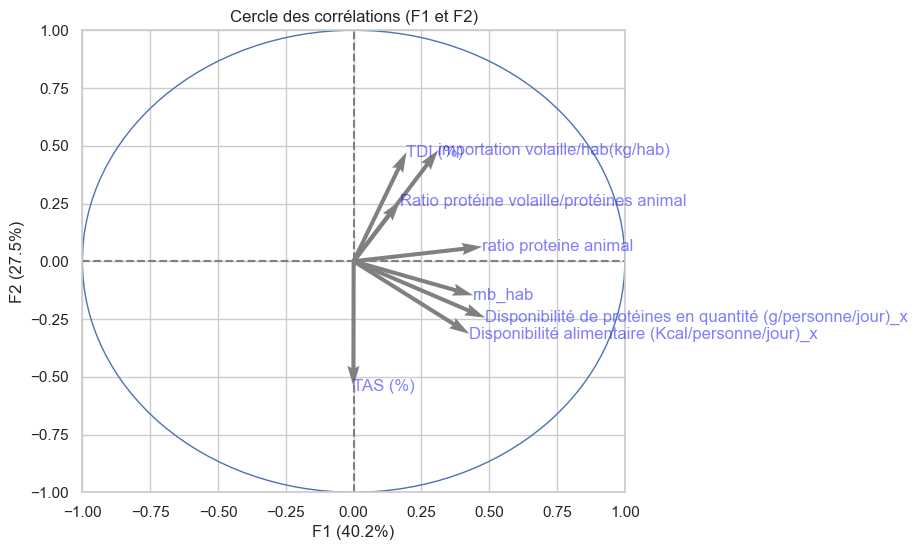

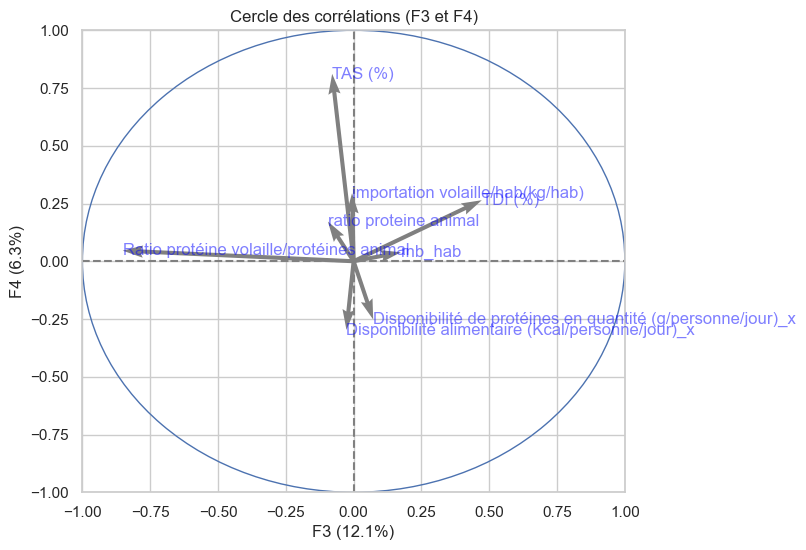

In [60]:
# choix du nombre de composantes à calculer
n_comp = 5
# selection des colonnes à prendre en compte dans l'ACP
features = df.columns
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features) )
plt.show()

### Projection des individus

In [61]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,7))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

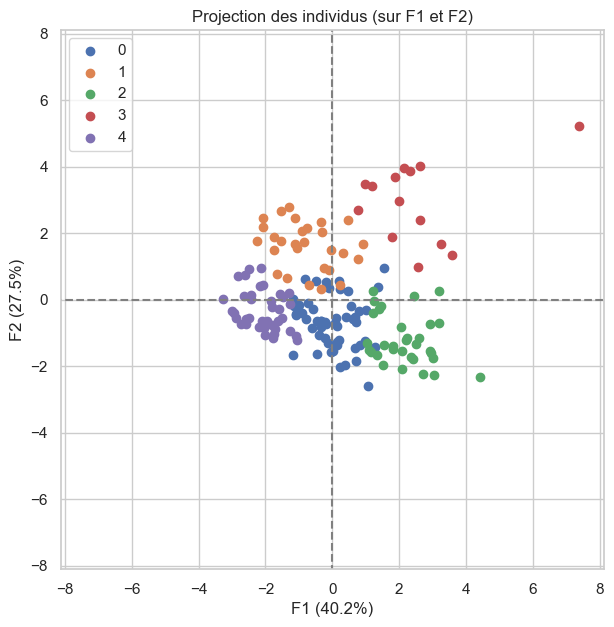

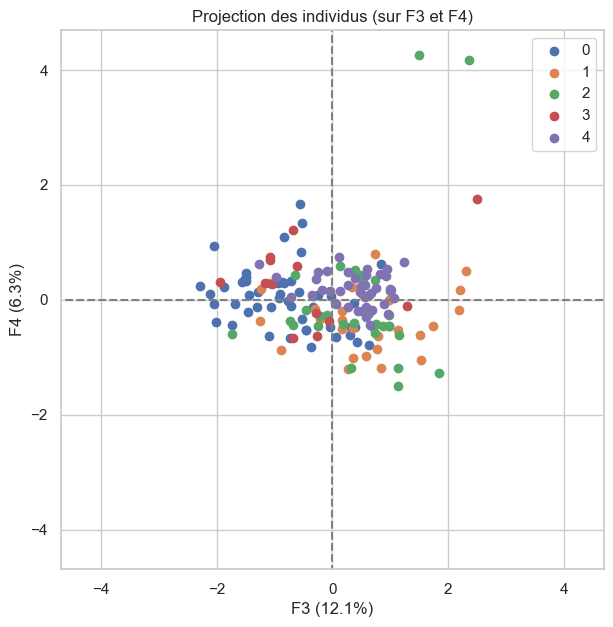

<Figure size 1000x1000 with 0 Axes>

In [62]:
# selection des intitulés des groupes
names = df_c["cluster"]  
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], illustrative_var = names, alpha = 1)
figure3 = plt.figure(figsize=(10,10))
plt.show()

### Observation

Sur le graphique n°1 :  
* le groupe n°3 ce détache :  
        TDI élevé, TAS faible, bonne disponibilité global et rnb élevé 
    
* le groupe n°1 ce détache :  
        TDI élevé, TAS faible, mauvaise disponibilité global et rnb faible

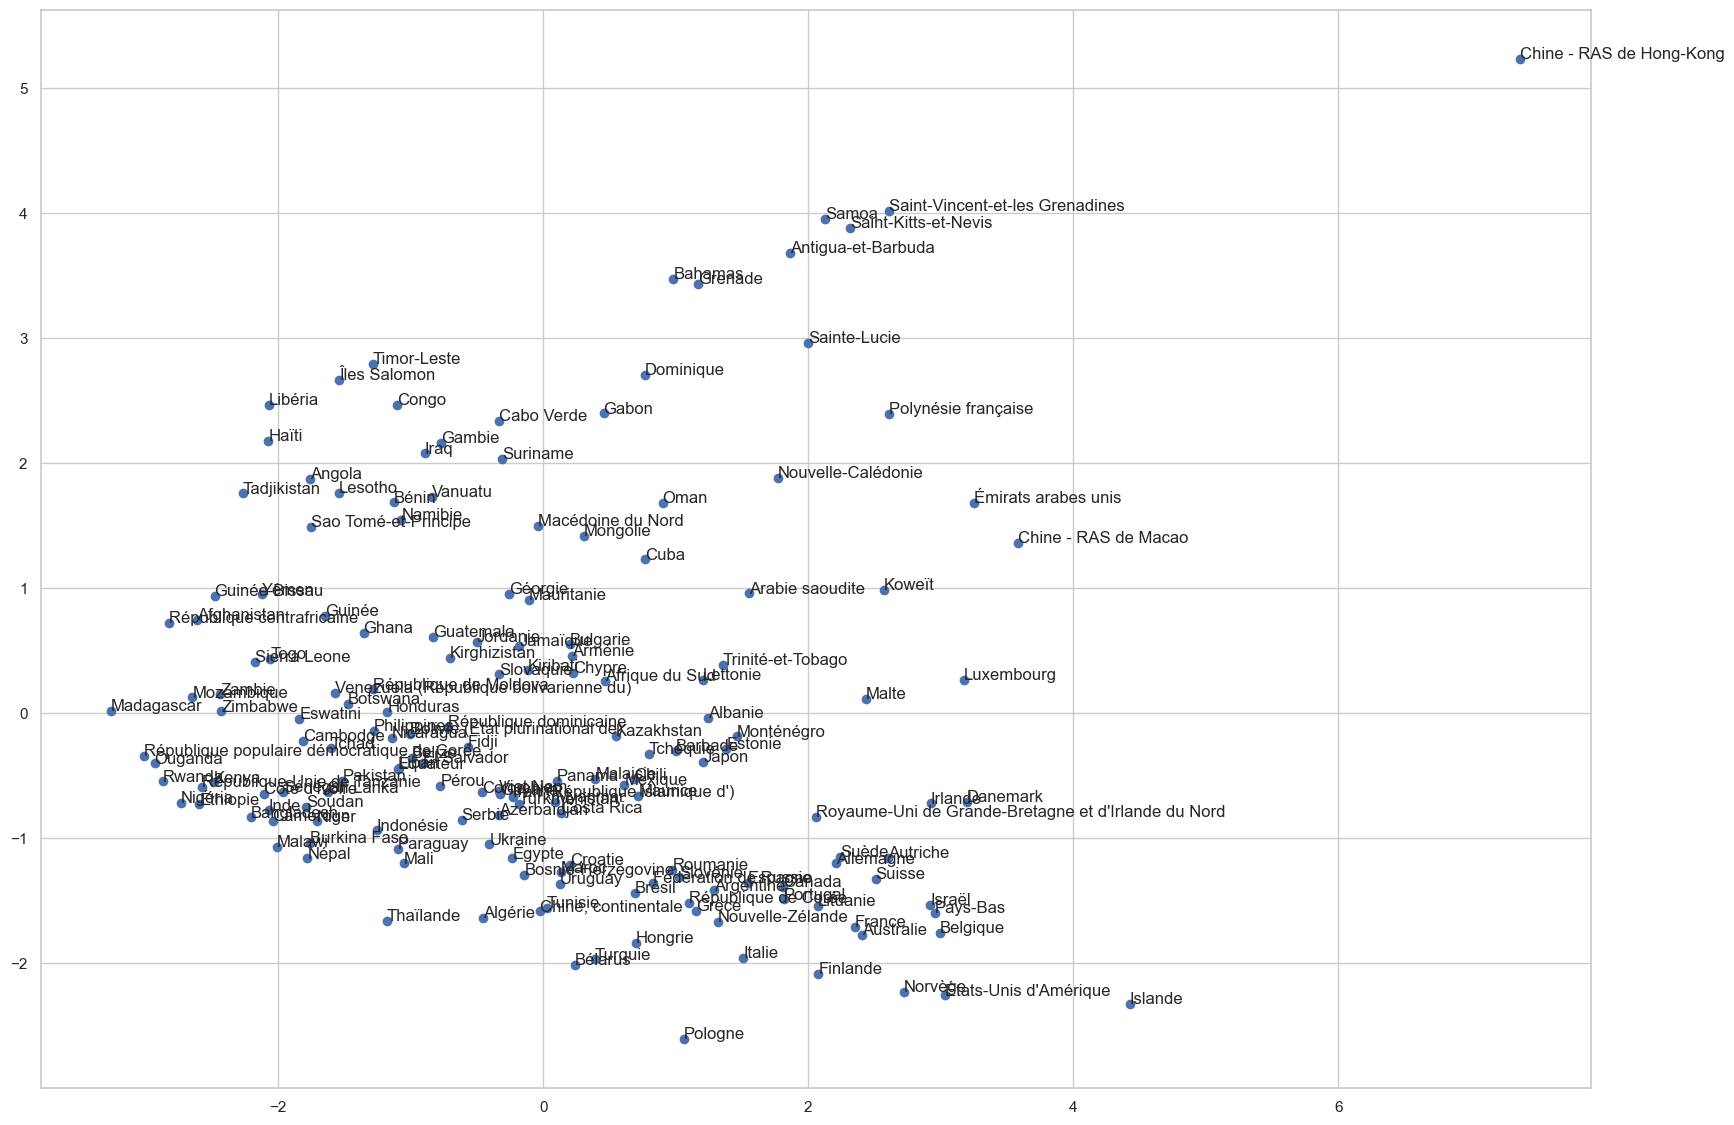

In [63]:
# afficher chaque observation sur le plan factoriel
plt.figure(figsize=(20, 14))

plt.scatter(X_projected[:, 0], X_projected[:, 1])

#afficher les nom des pays
for i, (x, y) in enumerate (zip(X_projected[:,0],
                            X_projected[:,1])) :
    plt.text(x, y,df.index[i])

## Analyst Pestel  <a class="anchor" id="pestel"></a>

Pour terminer notre analyse, nous allons procéder à notre pestel pour rajouter quelque critère de selection :  
   * Stabilité politique  
   * Leur population

In [64]:
stab_2017 = pd.read_csv("stabilite_politique_2017.csv")
pop=pd.read_csv('pop_2017.csv')

In [84]:
notregroupe1

,clusters cah,Zone,cluster,Zone
6,3.0,Antigua-et-Barbuda,3.0,Antigua-et-Barbuda
13,3.0,Bahamas,3.0,Bahamas
31,3.0,Chine - RAS de Hong-Kong,3.0,Chine - RAS de Hong-Kong
32,3.0,Chine - RAS de Macao,3.0,Chine - RAS de Macao
54,3.0,Grenade,3.0,Grenade
79,3.0,Koweït,3.0,Koweït
85,3.0,Luxembourg,NaN,NaN
105,3.0,Nouvelle-Calédonie,3.0,Nouvelle-Calédonie
116,3.0,Polynésie française,3.0,Polynésie française
128,3.0,Saint-Kitts-et-Nevis,3.0,Saint-Kitts-et-Nevis


In [85]:
notregroupe2

,clusters cah,Zone,cluster,Zone
5,2.0,Angola,1,Angola
25,2.0,Bénin,1,Bénin
26,2.0,Cabo Verde,1,Cabo Verde
36,2.0,Congo,1,Congo
52,2.0,Gambie,1,Gambie
53,2.0,Ghana,1,Ghana
57,2.0,Guinée,1,Guinée
61,2.0,Haïti,1,Haïti
67,2.0,Iraq,1,Iraq
80,2.0,Lesotho,1,Lesotho


### Stabilité politique

In [67]:
stab_2017

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,8,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,12,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,FS,Données de la sécurité alimentaire,862,Venezuela (République bolivarienne du),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-1.27,X,Ciffre de sources internationales,NaN
193,FS,Données de la sécurité alimentaire,704,Viet Nam,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.23,X,Ciffre de sources internationales,NaN
194,FS,Données de la sécurité alimentaire,887,Yémen,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.94,X,Ciffre de sources internationales,NaN
195,FS,Données de la sécurité alimentaire,894,Zambie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.15,X,Ciffre de sources internationales,NaN


In [68]:
Zone1=['Antigua-et-Barbuda','Bahamas','Chine - RAS de Hong-Kong','Chine - RAS de Macao','Grenade','Koweït','Luxembourg','Saint-Kitts-et-Nevis','Saint-Vincent-et-les Grenadines','Sainte-Lucie','Samoa','Émirats arabes unis','Dominique']
stab = pd.pivot_table(stab_2017, index ='Zone', values= "Valeur", aggfunc= 'sum')
stab = stab.loc[Zone1].sort_values('Valeur', ascending = False)
stab

,Valeur
Zone,
Chine - RAS de Macao,1.43
Luxembourg,1.33
Dominique,1.20
Samoa,1.18
Grenade,1.01
Bahamas,0.99
Sainte-Lucie,0.99
Saint-Vincent-et-les Grenadines,0.89
Chine - RAS de Hong-Kong,0.83


Pas de valeur pour la nouvelle-calédonie et Polynésie francaise (îles donc pas necessaire)

### Population

In [69]:
pop

,Zone,population
0,Afghanistan,36296113.0
1,Afrique du Sud,57009756.0
2,Albanie,2884169.0
3,Algérie,41389189.0
4,Allemagne,82658409.0
...,...,...
231,Îles Salomon,636039.0
232,Îles Turques-et-Caïques,37115.0
233,Îles Vierges américaines,104751.0
234,Îles Vierges britanniques,29577.0


In [70]:
pop.set_index('Zone',inplace=True)

In [71]:
pop1=pop.loc[['Antigua-et-Barbuda','Bahamas','Chine - RAS de Hong-Kong','Chine - RAS de Macao','Grenade','Koweït','Luxembourg','Saint-Kitts-et-Nevis','Saint-Vincent-et-les Grenadines','Sainte-Lucie','Samoa','Émirats arabes unis','Dominique']].sort_values('population', ascending= False)
pop1

,population
Zone,
Émirats arabes unis,9487203.0
Chine - RAS de Hong-Kong,7306322.0
Koweït,4056099.0
Chine - RAS de Macao,622585.0
Luxembourg,591910.0
Bahamas,381755.0
Samoa,195352.0
Sainte-Lucie,180954.0
Grenade,110874.0


In [72]:
df_pest=pd.merge(stab, pop1, on='Zone', how='left')
df_pest

,Valeur,population
Zone,,
Chine - RAS de Macao,1.43,622585.0
Luxembourg,1.33,591910.0
Dominique,1.20,71458.0
Samoa,1.18,195352.0
Grenade,1.01,110874.0
Bahamas,0.99,381755.0
Sainte-Lucie,0.99,180954.0
Saint-Vincent-et-les Grenadines,0.89,109827.0
Chine - RAS de Hong-Kong,0.83,7306322.0


Pour tous ces pays le taux de dépendance à l'importation est élevé et inversement le taux d'autosuffisance est faible  
Nous pouvons donc privilégie en priorité les pays avec un index de stabilité politque élevé et une forte population

In [73]:
Kcluster5.sort_values('TDI (%)',ascending=False)

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Guinée-Bissau,2252.0,44.13,0.88,7.82,100.00,75.00,2.188010,719.711565,4
Afghanistan,1997.0,54.09,1.08,5.11,50.88,49.12,0.798984,537.126294,4
Sierra Leone,2452.0,55.66,0.93,9.28,46.67,56.67,1.869553,479.354351,4
Botswana,2338.0,65.09,1.84,4.41,42.86,71.43,1.360495,6136.369105,4
République centrafricaine,1754.0,46.40,1.54,3.84,36.36,63.64,0.870318,435.871219,4
Yémen,2062.0,53.24,1.29,28.36,31.71,68.29,2.802246,608.982554,4
Togo,2426.0,57.31,0.77,25.34,29.63,74.07,2.078334,818.992647,4
Eswatini,2406.0,61.22,1.26,12.17,28.57,85.71,1.778086,3566.576151,4
Cambodge,2468.0,65.38,1.40,3.83,26.32,73.68,0.624633,1313.916887,4


In [74]:
cluster3cah.sort_values('TDI (%)',ascending=False)

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Chine - RAS de Hong-Kong,3353.0,137.88,4.80,21.82,323.93,8.57,124.139068,47724.637597,3
Chine - RAS de Macao,2999.0,100.37,3.43,17.42,121.05,15.79,36.942747,70300.937271,3
Samoa,2971.0,85.70,2.34,40.97,113.33,0.00,87.022401,4142.663054,3
Saint-Vincent-et-les Grenadines,2962.0,89.17,2.74,50.90,112.50,0.00,81.947062,8067.203114,3
Émirats arabes unis,3370.0,107.26,2.57,33.46,105.10,11.65,45.640427,42828.653410,3
Antigua-et-Barbuda,2429.0,81.15,3.13,32.71,100.00,0.00,73.355270,15667.510958,3
Luxembourg,3334.0,105.79,2.49,10.64,100.00,0.00,18.583906,78873.811060,3
Polynésie française,2917.0,97.51,3.55,24.54,100.00,6.67,54.327748,19743.958991,3
Saint-Kitts-et-Nevis,2517.0,76.86,3.45,38.59,100.00,0.00,76.856566,21139.240117,3


### Cluster 2

In [75]:
Zone2 = ['Angola','Bénin','Cabo Verde','Congo','Gambie','Ghana','Guinée','Haïti','Iraq','Lesotho','Libéria','Namibie','Sao Tomé-et-Principe','Suriname','Tadjikistan','Timor-Leste','Vanuatu','Îles Salomon','Arménie','Cuba','Gabon','Géorgie','Kirghizistan','Macédoine du Nord','Mauritanie','Mongolie','Oman','Slovaquie']
stab2 = pd.pivot_table(stab_2017, index ='Zone', values= "Valeur", aggfunc= 'sum')
stab2 = stab2.loc[Zone2].sort_values('Valeur',ascending = False)
stab2

,Valeur
Zone,
Slovaquie,0.91
Mongolie,0.79
Cabo Verde,0.77
Oman,0.75
Vanuatu,0.70
Cuba,0.65
Namibie,0.63
Îles Salomon,0.20
Sao Tomé-et-Principe,0.19


In [76]:
pop2=pop.loc[['Angola','Bénin','Cabo Verde','Congo','Gambie','Ghana','Guinée','Haïti','Iraq','Lesotho','Libéria','Namibie','Sao Tomé-et-Principe','Suriname','Tadjikistan','Timor-Leste','Vanuatu','Îles Salomon','Arménie','Cuba','Gabon','Géorgie','Kirghizistan','Macédoine du Nord','Mauritanie','Mongolie','Oman','Slovaquie']].sort_values('population', ascending= False)
pop2

,population
Zone,
Iraq,37552781.0
Angola,29816766.0
Ghana,29121465.0
Guinée,12067519.0
Cuba,11339254.0
Bénin,11175198.0
Haïti,10982366.0
Tadjikistan,8880268.0
Kirghizistan,6189733.0


In [77]:
df_pest2=pd.merge(stab2, pop2, on='Zone', how='left')
df_pest2

,Valeur,population
Zone,,
Slovaquie,0.91,5447900.0
Mongolie,0.79,3113786.0
Cabo Verde,0.77,537498.0
Oman,0.75,4665928.0
Vanuatu,0.70,285510.0
Cuba,0.65,11339254.0
Namibie,0.63,2402633.0
Îles Salomon,0.20,636039.0
Sao Tomé-et-Principe,0.19,207089.0


In [78]:
Kcluster3.sort_values('importation volaille/hab(kg/hab)',ascending=False)

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,cluster
Zone,,,,,,,,,
Pays-Bas,3251.0,104.43,2.64,12.39,163.44,295.70,35.719852,47903.524246,2
Belgique,3770.0,101.35,2.08,7.90,222.37,304.61,29.597851,44567.104136,2
Danemark,3383.0,112.92,2.78,17.71,79.64,103.59,23.201961,59155.352620,2
Lettonie,3170.0,97.27,2.17,12.94,104.88,80.49,22.038884,15554.718880,2
Irlande,3714.0,105.81,2.26,19.13,77.34,85.94,20.827728,56058.607933,2
Malte,3460.0,116.32,2.75,18.93,64.29,28.57,20.551089,25310.086716,2
Luxembourg,3334.0,105.79,2.49,10.64,100.00,0.00,18.583906,78873.811060,2
Estonie,3241.0,107.29,2.18,11.80,72.41,68.97,15.916446,19932.665237,2
Lituanie,3419.0,125.06,2.62,12.64,53.66,143.90,15.463479,15848.768221,2


In [79]:
cluster2cah.sort_values('TDI (%)',ascending=False)

,Disponibilité alimentaire (Kcal/personne/jour)_x,Disponibilité de protéines en quantité (g/personne/jour)_x,ratio proteine animal,Ratio protéine volaille/protéines animal,TDI (%),TAS (%),importation volaille/hab(kg/hab),rnb_hab,clusters cah
Zone,,,,,,,,,
Timor-Leste,2142.0,57.69,1.48,9.21,220.00,20.00,8.847721,1840.661924,2
Îles Salomon,2410.0,53.64,0.89,9.38,200.00,0.00,9.433384,2237.997123,2
Gambie,2542.0,63.48,1.75,7.38,200.00,25.00,7.227101,620.135020,2
Vanuatu,2623.0,63.72,1.42,15.90,133.33,33.33,14.010017,3040.118580,2
Cabo Verde,2512.0,69.33,1.82,25.01,120.00,10.00,22.325664,3025.033509,2
Namibie,2429.0,62.00,1.48,18.45,103.57,39.29,12.070091,5351.575587,2
Sao Tomé-et-Principe,2417.0,52.00,0.95,20.09,100.00,50.00,9.657683,1814.542337,2
Libéria,2127.0,39.91,0.95,37.89,96.00,30.00,10.207931,522.924492,2
Tadjikistan,2099.0,55.38,0.91,10.72,95.00,5.00,4.279150,967.696202,2


# Conclusion <a class="anchor" id="conclusion"></a>

Pour terminer, nous pouvons partir sur le **Luxembourg** (pays européen) qui ce trouve seulement dans notre cluster de CAH.  
Si nous voulions choisir d'autre pays, ecartons les iles et la Chine de notre choix(difficulter commercial ou pas assez rentable) il nous reste donc les Emirats arabes-unis OU le choix d'aller chercher dans notre 2é clusters  

Dans notre deuxième cluster nous avons Oman, la mongolie(mais tres faible rnb), le Gabon(mais faible stabilité politique)


Pour résumer : 
    
    * Le Luxembourg (Valeur sûre!)
        -En EUROPE (absence de frais de douane)
        -rnb élevé , TDI élevé
    * Les Emirat arabes-unis ainsi que l'oman et le koweït (a voir les accords commercials ainsi que les normes)
    * La mongolie (faible rnb)
    * Certain pays d'afrique du Nord comme : Le Gabon, le Congo (mais faible stabilité politique)